In [73]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [74]:
# Store file paths in a variable
occupation_data_file = Path("Resources/national_M2022_dl.xlsx")
employment_data_file = Path("Resources/occupation.xlsx")
automation_file = Path("Resources/automation_data_by_state.csv")
occupation_gender_file = Path("Resources/cpsaat11.xlsx")

In [75]:
# Read the files into dataframes
occupation_group_data = pd.read_excel(occupation_data_file)
employment_data_df = pd.read_excel(employment_data_file, sheet_name ="Table 1.7",header=1)
job_decline_df = pd.read_excel(employment_data_file, sheet_name ="Table 1.6",header=1)
years_experience = pd.read_excel(employment_data_file, sheet_name ="Table 5.4",header=1)
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")
occupation_gender_df = pd.read_excel(occupation_gender_file,header=None)

In [76]:
# Sample data of occupation_group_data dataframe
occupation_group_data.sample(10)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1328,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-3030,Driver/Sales Workers and Truck Drivers,...,22.26,28.17,35.17,27520,36290,46300,58590,73140,NaN,NaN
80,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,13-1030,"Claims Adjusters, Appraisers, Examiners, and I...",...,34.63,40.75,49.27,46250,57290,72040,84750,102470,NaN,NaN
350,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,25-1000,Postsecondary Teachers,...,*,*,*,46100,59980,79080,110050,169760,True,NaN
110,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,13-2011,Accountants and Auditors,...,37.5,48.63,63.79,48560,60920,78000,101150,132690,NaN,NaN
482,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,27-3011,Broadcast Announcers and Radio Disc Jockeys,...,20.07,32.88,82.52,23920,31030,41750,68400,171650,NaN,NaN
1206,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,51-4191,"Heat Treating Equipment Setters, Operators, an...",...,19.66,23.63,28.35,31250,36020,40900,49160,58970,NaN,NaN
489,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,27-3042,Technical Writers,...,38.44,49.1,61.59,47460,61260,79960,102120,128110,NaN,NaN
1109,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,49-9000,"Other Installation, Maintenance, and Repair Oc...",...,23.25,30.21,38.59,30660,37610,48360,62830,80260,NaN,NaN
253,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,19-2021,Atmospheric and Space Scientists,...,40.28,55.48,68.04,50490,66210,83780,115400,141520,NaN,NaN
1071,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,49-1010,"First-Line Supervisors of Mechanics, Installer...",...,35.16,44.5,53.86,44900,56760,73140,92560,112020,NaN,NaN


In [77]:
# Columns
occupation_group_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [78]:
# Select the requred columns-'OCC_CODE', 'OCC_TITLE', 'O_GROUP'
occupation_group_data = occupation_group_data[['OCC_CODE', 'OCC_TITLE', 'O_GROUP']]

In [79]:
# Rename the columns
occupation_group_data.rename(columns={'OCC_CODE':"2022 National Employment Matrix code",'OCC_TITLE' : "2022 National Employment Matrix title",'O_GROUP':"Occupation Group" },inplace=True)
occupation_group_data.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group
0,00-0000,All Occupations,total
1,11-0000,Management Occupations,major
2,11-1000,Top Executives,minor
3,11-1010,Chief Executives,broad
4,11-1011,Chief Executives,detailed


In [80]:
# Count of each column items
occupation_group_data.count()

2022 National Employment Matrix code     1402
2022 National Employment Matrix title    1402
Occupation Group                         1402
dtype: int64

In [81]:
# Check for duplicate records
occupation_group_data.duplicated().sample(10)

678     False
408     False
783     False
32      False
945     False
1341    False
514     False
328     False
1033    False
676     False
dtype: bool

In [82]:
# Reset the index of employment_data_df dataframe
employment_data_df.reset_index()

employment_data_df.head()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310.0,—,—,—
1,Management occupations,11-0000,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360.0,—,—,—
2,Top executives,11-1000,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890.0,—,—,—
3,Chief executives,11-1011,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520.0,Bachelor's degree,5 years or more,NaN
4,General and operations managers,11-1021,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100.0,Bachelor's degree,5 years or more,NaN


In [83]:
# Display the columns
employment_data_df.columns

Index(['2022 National Employment Matrix title',
       '2022 National Employment Matrix code', 'Occupation type',
       'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation'],
      dtype='object')

In [84]:
# Count of each column items
employment_data_df.count()

2022 National Employment Matrix title                                        1117
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1103
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [85]:
# Remove the footer in the last 4 lines
employment_data_df = employment_data_df.drop(employment_data_df.index[-4:], axis=0)
employment_data_df.tail()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
1108,"Pump operators, except wellhead pumpers",53-7072,Line item,11.2,11.6,0.4,3.6,—,1.2,55860.0,High school diploma or equivalent,NaN,Moderate-term on-the-job training
1109,Wellhead pumpers,53-7073,Line item,16.2,15.9,-0.4,-2.2,0.4,1.6,63280.0,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
1110,Refuse and recyclable material collectors,53-7081,Line item,146.4,151.1,4.7,3.2,7.6,18.6,43540.0,No formal educational credential,NaN,Short-term on-the-job training
1111,"Tank car, truck, and ship loaders",53-7121,Line item,13.3,13.5,0.2,1.6,3.3,1.6,53930.0,No formal educational credential,NaN,Short-term on-the-job training
1112,"Material moving workers, all other",53-7199,Line item,26.1,27.0,0.9,3.5,3.1,3.2,38800.0,No formal educational credential,NaN,Short-term on-the-job training


In [86]:
# Count of each column items
employment_data_df.count()

2022 National Employment Matrix title                                        1113
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1103
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [87]:
# merge the occupation_group_data and employment_data_df dataframes
employment_wage_education = pd.merge(occupation_group_data,employment_data_df ,on= ["2022 National Employment Matrix code","2022 National Employment Matrix code"])
employment_wage_education.head(50)

,2022 National Employment Matrix code,2022 National Employment Matrix title_x,Occupation Group,2022 National Employment Matrix title_y,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,00-0000,All Occupations,total,"Total, all occupations",Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310.0,—,—,—
1,11-0000,Management Occupations,major,Management occupations,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360.0,—,—,—
2,11-1000,Top Executives,minor,Top executives,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890.0,—,—,—
3,11-1011,Chief Executives,detailed,Chief executives,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520.0,Bachelor's degree,5 years or more,NaN
4,11-1021,General and Operations Managers,detailed,General and operations managers,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100.0,Bachelor's degree,5 years or more,NaN
5,11-1031,Legislators,detailed,Legislators,Line item,44.4,46.0,1.5,3.4,—,3.4,48090.0,Bachelor's degree,Less than 5 years,NaN
6,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,"Advertising, marketing, promotions, public...",Summary,1049.4,1102.2,52.8,5.0,3.5,85.0,132820.0,—,—,—
7,11-2011,Advertising and Promotions Managers,detailed,Advertising and promotions managers,Line item,30.9,31.4,0.6,1.9,27,2.8,127830.0,Bachelor's degree,Less than 5 years,NaN
8,11-2020,Marketing and Sales Managers,broad,Marketing and sales managers,Summary,912.9,959.1,46.2,5.1,2.9,74.4,133880.0,—,—,—
9,11-2021,Marketing Managers,detailed,Marketing managers,Line item,358.2,381.9,23.7,6.6,5.3,31.2,140040.0,Bachelor's degree,5 years or more,NaN


In [88]:
# Drop the 2022 National Employment Matrix title_y column
employment_wage_education = employment_wage_education.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
employment_wage_education.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [89]:
# Count of each column items
employment_wage_education.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title                                        1117
Occupation Group                                                             1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical education needed for entry                                           1117
Work experience 

In [90]:
# Display some sample data of automation_data dataframe
automation_data.sample(50)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
361,39-9041,Residential Advisors,0.0640,2250,150,1010,850,6560,540,1990,...,2350,7850,7810,2150,410,3150,1350,770,2330,290
391,43-3071,Tellers,0.9800,9400,1290,6220,6130,43510,7150,5140,...,2190,10420,49510,5520,1120,11680,10350,3300,12270,1050
165,23-1011,Lawyers,0.0350,5380,930,9910,3040,76840,11230,7260,...,760,7570,43240,4580,1120,16890,10760,2260,7530,810
466,47-2141,Painters; Construction and Maintenance,0.7500,1940,380,4730,1340,35210,4010,1740,...,570,3010,18740,2420,690,6260,9100,720,3260,590
150,19-4093,Forest and Conservation Technicians,0.4200,240,460,1350,240,6960,1170,0,...,0,0,370,1370,0,260,1290,90,570,660
107,17-3027,Mechanical Engineering Technicians,0.3800,710,100,560,210,4030,460,950,...,140,1250,4980,1050,40,1170,820,0,2000,0
114,19-1022,Microbiologists,0.0120,110,40,120,150,5070,450,0,...,60,310,800,190,40,380,290,50,340,0
272,29-9012,Occupational Health and Safety Technicians,0.2500,100,100,260,180,1290,210,140,...,0,550,3150,170,0,390,470,110,260,70
433,43-9111,Statistical Assistants,0.6600,80,0,210,40,800,130,80,...,0,40,670,90,0,70,480,0,110,0
210,27-2023,Umpires; Referees; and Other Sports Officials,0.9800,90,240,410,0,1740,1280,300,...,0,560,970,0,60,650,400,130,510,0


In [91]:
# Count of each column items
automation_data.count()

SOC                     702
Occupation              702
Probability             702
Alabama                 702
Alaska                  702
Arizona                 702
Arkansas                702
California              702
Colorado                702
Connecticut             702
Delaware                702
District of Columbia    702
Florida                 702
Georgia                 702
Hawaii                  702
Idaho                   702
Illinois                702
Indiana                 702
Iowa                    702
Kansas                  702
Kentucky                702
Louisiana               702
Maine                   702
Maryland                702
Massachusetts           702
Michigan                702
Minnesota               702
Mississippi             702
Missouri                702
Montana                 702
Nebraska                702
Nevada                  702
New Hampshire           702
New Jersey              702
New Mexico              702
New York            

In [92]:
# Rename the columns "SOC" to "2022 National Employment Matrix code" and "Probability" to "Automation Probability"
automation_data.rename(columns={"SOC":"2022 National Employment Matrix code","Probability":"Automation Probability"},inplace =True) 

In [93]:
automation_data.head()

,2022 National Employment Matrix code,Occupation,Automation Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


In [94]:
# Merge the employment_wage_education and automation_data dataframes
occupation_automation_df = pd.merge(employment_wage_education,automation_data,how="left",on=["2022 National Employment Matrix code","2022 National Employment Matrix code"])
occupation_automation_df.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average",...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,00-0000,All Occupations,total,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-1000,Top Executives,minor,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,...,560.0,5460.0,5890.0,3650.0,280.0,6320.0,5910.0,980.0,3740.0,160.0
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,...,3730.0,44400.0,168610.0,36200.0,2760.0,52380.0,43760.0,10200.0,32350.0,4840.0


In [95]:
# Display the count of column items
occupation_automation_df.columns
occupation_automation_df.count()

2022 National Employment Matrix code     1117
2022 National Employment Matrix title    1117
Occupation Group                         1117
Occupation type                          1117
Employment, 2022                         1117
                                         ... 
Virginia                                  606
Washington                                606
West Virginia                             606
Wisconsin                                 606
Wyoming                                   606
Length: 67, dtype: int64

In [96]:
# sample data of occupation_gender_df dataframe
occupation_gender_df.reset_index()

occupation_gender_df.head(50)

,0,1,2,3,4,5,6,7
0,NaN,HOUSEHOLD DATA\nANNUAL AVERAGES\n11. Employed ...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[Numbers in thousands],NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Occupation,2022,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Total\nemployed,Percent of total employed,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Women,White,Black or\nAfrican\nAmerican,Asian,Hispanic\nor Latino
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Total, 16 years and over",158291,46.8,77,12.6,6.7,18.5
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,"Management, professional, and related occupat...",68099,51.5,77.7,10.2,9,10.9


In [97]:
# Exculde the header rows
occupation_gender_df = occupation_gender_df.iloc[9:]

In [98]:
# Name columns
occupation_gender_df.columns = ["2022 National Employment Matrix code","2022 National Employment Matrix title","Total employed", "Women","White","Black or African American","Asian","Hispanic or Latino"]

In [99]:
# Merge occupation_automation_df,occupation_gender_df dataframes
occupation_data_complete = pd.merge(occupation_automation_df,occupation_gender_df,how = "left",on="2022 National Employment Matrix code")


In [100]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title_x', 'Occupation Group',
       'Occupation type', 'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Occupation', 'Automation Probability', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Neva

In [101]:
# Drop the 2022 National Employment Matrix title_y column
occupation_data_complete = occupation_data_complete.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
occupation_data_complete.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [102]:
occupation_data_complete.count()

2022 National Employment Matrix code     1119
2022 National Employment Matrix title    1119
Occupation Group                         1119
Occupation type                          1119
Employment, 2022                         1119
                                         ... 
Women                                     582
White                                     582
Black or African American                 582
Asian                                     582
Hispanic or Latino                        582
Length: 73, dtype: int64

In [103]:
occupation_data_complete.head(20)

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average",...,Washington,West Virginia,Wisconsin,Wyoming,Total employed,Women,White,Black or African American,Asian,Hispanic or Latino
0,00-0000,All Occupations,total,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,...,NaN,NaN,NaN,NaN,20199,40.5,81.6,9,6.6,11.5
2,11-1000,Top Executives,minor,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,...,5910.0,980.0,3740.0,160.0,1780,29.2,85.9,5.9,6.7,6.8
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,...,43760.0,10200.0,32350.0,4840.0,1165,35.4,82.4,9.1,5.3,11.5
5,11-1031,Legislators,detailed,Line item,44.4,46.0,1.5,3.4,—,3.4,...,NaN,NaN,NaN,NaN,14,–,–,–,–,–
6,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,Summary,1049.4,1102.2,52.8,5.0,3.5,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11-2011,Advertising and Promotions Managers,detailed,Line item,30.9,31.4,0.6,1.9,27,2.8,...,640.0,40.0,200.0,0.0,68,49.7,80.3,13.8,4.4,8.9
8,11-2020,Marketing and Sales Managers,broad,Summary,912.9,959.1,46.2,5.1,2.9,74.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11-2021,Marketing Managers,detailed,Line item,358.2,381.9,23.7,6.6,5.3,31.2,...,5830.0,260.0,2980.0,30.0,656,58.9,83.9,6.8,7.5,11.4


In [104]:
# Create a dataframe for all the major sectors
Employment_distribution_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major" ]
Employment_distribution_df.count()



2022 National Employment Matrix code     22
2022 National Employment Matrix title    22
Occupation Group                         22
Occupation type                          22
Employment, 2022                         22
                                         ..
Women                                    22
White                                    22
Black or African American                22
Asian                                    22
Hispanic or Latino                       22
Length: 73, dtype: int64

In [105]:
Employment_distribution_df =Employment_distribution_df[["2022 National Employment Matrix title",'Employment, 2022','Employment, 2032']]
Employment_distribution_df.set_index("2022 National Employment Matrix title")
Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")
Employment_distribution_df = Employment_distribution_df.set_index("2022 National Employment Matrix title")
Employment_distribution_df

,"Employment, 2022","Employment, 2032"
2022 National Employment Matrix title,,
Management,12574.7,13257.7
Business and Financial Operations,10591.1,11179.7
Computer and Mathematical,5277.6,6081.4
Architecture and Engineering,2611.8,2746.8
"Life, Physical, and Social Science",1473.7,1563.2
Community and Social Service,2936.5,3164.2
Legal,1362.4,1442.3
Educational Instruction and Library,9354.1,9570.6
"Arts, Design, Entertainment, Sports, and Media",3071.1,3187.0


<Axes: xlabel='Major Employment Sectors', ylabel='Employment (Numbers in thousands)'>

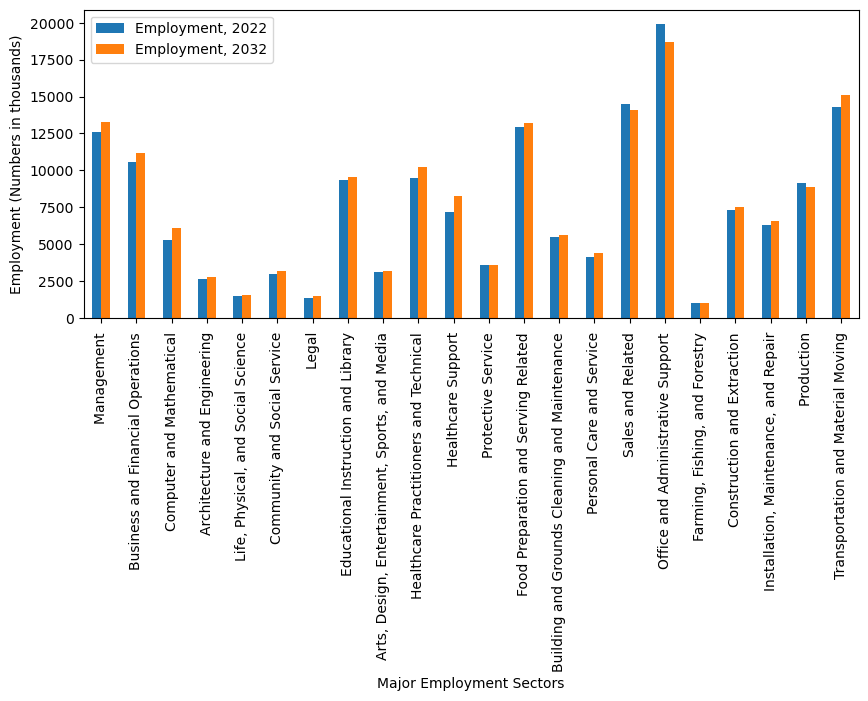

In [106]:
Employment_distribution_df.plot(kind="bar",xlabel='Major Employment Sectors',ylabel = "Employment (Numbers in thousands)", figsize=(10,4))

In [107]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title', 'Occupation Group',
       'Occupation type', 'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Occupation', 'Automation Probability', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada

In [108]:
# Occupations that are highly impacted by automation
occupation_detailed = occupation_data_complete[occupation_data_complete['Occupation Group']=="detailed"]
occupation_detailed.columns
occupation_automation = occupation_detailed[['2022 National Employment Matrix title',"Automation Probability"] ]

occupation_automation.dropna()
occupation_automation_sorted = occupation_automation.sort_values("Automation Probability",ascending=False)
occupation_automation_sorted.head(50)



,2022 National Employment Matrix title,Automation Probability
979,"Sewers, Hand",0.99
1037,Photographic Process Workers and Processing Ma...,0.99
83,Insurance Underwriters,0.99
897,Watch and Clock Repairers,0.99
349,Library Technicians,0.99
269,"Title Examiners, Abstractors, and Searchers",0.99
709,New Accounts Clerks,0.99
677,Telemarketers,0.99
91,Tax Preparers,0.99
716,Cargo and Freight Agents,0.99


In [109]:
# Fastest growing occupations- employment change percenatge > 18%
fastest_growing_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] > 18.0]
fastest_growing_occ = fastest_growing_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
fastest_growing_occ

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
40,Medical and Health Services Managers,28.4
65,Logisticians,18.3
85,Financial Examiners,19.5
97,Information Security Analysts,31.5
98,Computer and Information Research Scientists,22.7
109,Software Developers,25.7
110,Software Quality Assurance Analysts and Testers,20.3
115,Actuaries,23.2
117,Operations Research Analysts,22.5
118,Statisticians,31.6


In [110]:
# Fastest declining occupations- employment change percenatge < 0%
fastest_declining_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] < 0.0]
fastest_declining_occ = fastest_declining_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
fastest_declining_occ

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
3,Chief Executives,-8.2
27,"Farmers, Ranchers, and Other Agricultural Mana...",-4.6
30,"Education and Childcare Administrators, Presch...",-3.0
42,Postmasters and Mail Superintendents,-6.7
54,Buyers and Purchasing Agents,-7.7
...,...,...
1091,Bridge and Lock Tenders,-0.8
1104,Hoist and Winch Operators,-1.8
1110,"Packers and Packagers, Hand",-1.0
1113,Gas Compressor and Gas Pumping Station Operators,-2.1


In [111]:
occupation_detailed

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average",...,Washington,West Virginia,Wisconsin,Wyoming,Total employed,Women,White,Black or African American,Asian,Hispanic or Latino
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,...,5910.0,980.0,3740.0,160.0,1780,29.2,85.9,5.9,6.7,6.8
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,...,43760.0,10200.0,32350.0,4840.0,1165,35.4,82.4,9.1,5.3,11.5
5,11-1031,Legislators,detailed,Line item,44.4,46.0,1.5,3.4,—,3.4,...,NaN,NaN,NaN,NaN,14,–,–,–,–,–
7,11-2011,Advertising and Promotions Managers,detailed,Line item,30.9,31.4,0.6,1.9,27,2.8,...,640.0,40.0,200.0,0.0,68,49.7,80.3,13.8,4.4,8.9
9,11-2021,Marketing Managers,detailed,Line item,358.2,381.9,23.7,6.6,5.3,31.2,...,5830.0,260.0,2980.0,30.0,656,58.9,83.9,6.8,7.5,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,53-7072,"Pump Operators, Except Wellhead Pumpers",detailed,Line item,11.2,11.6,0.4,3.6,—,1.2,...,0.0,110.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1115,53-7073,Wellhead Pumpers,detailed,Line item,16.2,15.9,-0.4,-2.2,0.4,1.6,...,0.0,550.0,0.0,550.0,NaN,NaN,NaN,NaN,NaN,NaN
1116,53-7081,Refuse and Recyclable Material Collectors,detailed,Line item,146.4,151.1,4.7,3.2,7.6,18.6,...,1890.0,970.0,2140.0,230.0,112,10.6,69.6,25.8,1.6,26.7
1117,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,Line item,13.3,13.5,0.2,1.6,3.3,1.6,...,350.0,0.0,190.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
wages_data = occupation_detailed[["2022 National Employment Matrix code", "2022 National Employment Matrix title", "Median annual wage, 2022(1)"]]

In [113]:
wages_data

,2022 National Employment Matrix code,2022 National Employment Matrix title,"Median annual wage, 2022(1)"
3,11-1011,Chief Executives,189520.0
4,11-1021,General and Operations Managers,98100.0
5,11-1031,Legislators,48090.0
7,11-2011,Advertising and Promotions Managers,127830.0
9,11-2021,Marketing Managers,140040.0
...,...,...,...
1114,53-7072,"Pump Operators, Except Wellhead Pumpers",55860.0
1115,53-7073,Wellhead Pumpers,63280.0
1116,53-7081,Refuse and Recyclable Material Collectors,43540.0
1117,53-7121,"Tank Car, Truck, and Ship Loaders",53930.0


In [114]:
wages_data.info()
#["Median annual wage, 2022(1)"]=wages_data["Median annual wage, 2022(1)"].str.replace('$', '').str.replace(',', ''

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 3 to 1118
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   2022 National Employment Matrix code   832 non-null    object 
 1   2022 National Employment Matrix title  832 non-null    object 
 2   Median annual wage, 2022(1)            827 non-null    float64
dtypes: float64(1), object(2)
memory usage: 26.0+ KB


In [115]:
wages_data

,2022 National Employment Matrix code,2022 National Employment Matrix title,"Median annual wage, 2022(1)"
3,11-1011,Chief Executives,189520.0
4,11-1021,General and Operations Managers,98100.0
5,11-1031,Legislators,48090.0
7,11-2011,Advertising and Promotions Managers,127830.0
9,11-2021,Marketing Managers,140040.0
...,...,...,...
1114,53-7072,"Pump Operators, Except Wellhead Pumpers",55860.0
1115,53-7073,Wellhead Pumpers,63280.0
1116,53-7081,Refuse and Recyclable Material Collectors,43540.0
1117,53-7121,"Tank Car, Truck, and Ship Loaders",53930.0


In [116]:
#creating a Bar plot 
wages_data_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major"]
wages_data_df.count()
wages_data_df=wages_data_df[["2022 National Employment Matrix title", "Median annual wage, 2022(1)"]]
wages_data_df.set_index("2022 National Employment Matrix title", inplace=True)

Text(0.5, 1.0, 'Distribution of Wages for different sectors')

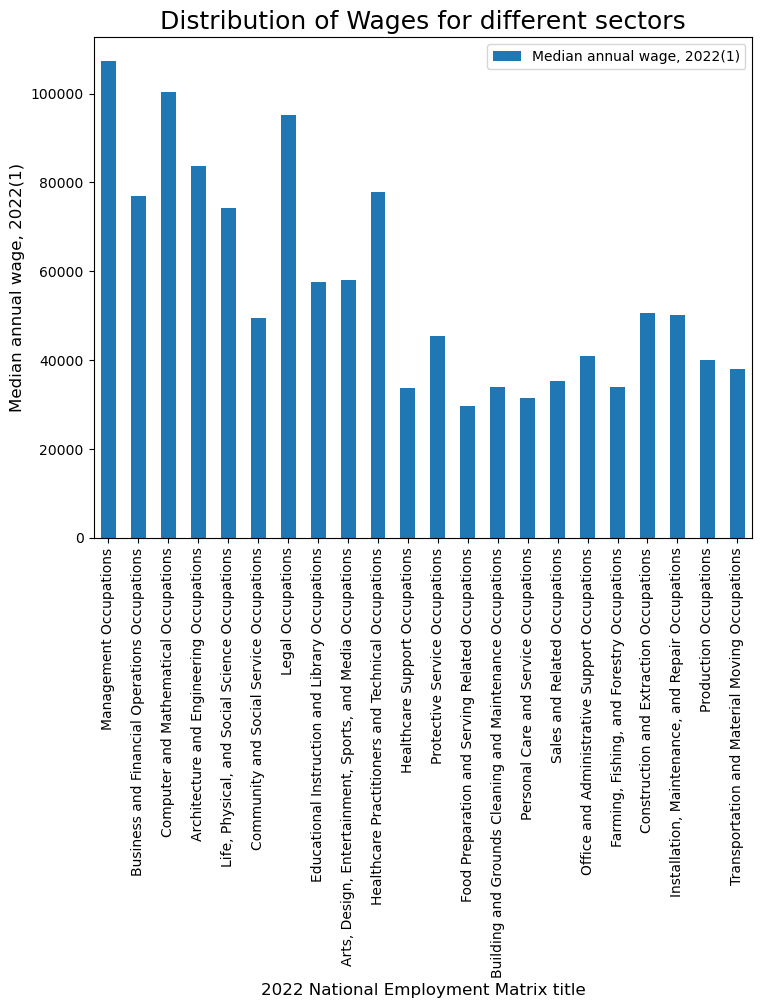

In [117]:
line_graph = wages_data_df.plot(kind="bar", figsize = (8.5,6.5))
line_graph.set_xlabel ("2022 National Employment Matrix title", size = 12)
line_graph.set_ylabel ("Median annual wage, 2022(1)", size = 12)
plt.title("Distribution of Wages for different sectors", size = 18)


In [118]:
#automation_selfemployment = occupation_data_complete[["Percent self employed, 2022", "Automation Probability"]]

In [119]:
#automation_selfemployment.head()

In [120]:
job_decline_df

,2022 National Employment Matrix title,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)"
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0


In [121]:
# Remove the footer in the last 4 lines
job_decline_df = job_decline_df.drop(job_decline_df.index[-3:], axis=0)
job_decline_df.tail()

,2022 National Employment Matrix title,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)"
26,Postal service mail carriers,43-5052,314.5,293.5,-21.0,-6.7,54250.0
27,"Cutting, punching, and press machine setters...",51-4031,184.8,164.7,-20.1,-10.9,39340.0
28,Bill and account collectors,43-3011,209.7,189.6,-20.1,-9.6,39470.0
29,Telemarketers,41-9041,97.7,77.6,-20.1,-20.6,31030.0
30,Childcare workers,39-9011,945.9,927.4,-18.5,-2.0,28520.0


In [122]:
job_decline_df

,2022 National Employment Matrix title,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)"
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0


In [123]:
years_experience

,2022 National Employment Matrix title,2022 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,NaN
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN
...,...,...,...,...,...
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training
831,"Material moving workers, all other",53-7199,No formal educational credential,NaN,Short-term on-the-job training


In [126]:
years_experience=years_experience.fillna(0)

In [127]:
years_experience

,2022 National Employment Matrix title,2022 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,0
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,0
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,0
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,0
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,0
...,...,...,...,...,...
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,0,Short-term on-the-job training
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,0,Short-term on-the-job training
831,"Material moving workers, all other",53-7199,No formal educational credential,0,Short-term on-the-job training


In [167]:
#merging data frames
main_data = pd.merge(job_decline_df, years_experience, how = "left",on="2022 National Employment Matrix code")

In [133]:
main_data=main_data.fillna(0)
main_data

,2022 National Employment Matrix title_x,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)",2022 National Employment Matrix title_y,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0,0,0,0,0
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0,Cashiers,No formal educational credential,0,Short-term on-the-job training
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0,"Secretaries and administrative assistants, exc...",High school diploma or equivalent,0,Short-term on-the-job training
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0,"Office clerks, general",High school diploma or equivalent,0,Short-term on-the-job training
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0,Customer service representatives,High school diploma or equivalent,0,Short-term on-the-job training
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0,Miscellaneous assemblers and fabricators,High school diploma or equivalent,0,Moderate-term on-the-job training
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0,"Bookkeeping, accounting, and auditing clerks","Some college, no degree",0,Moderate-term on-the-job training
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0,Executive secretaries and executive administra...,High school diploma or equivalent,Less than 5 years,0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0,"Cooks, fast food",No formal educational credential,0,Short-term on-the-job training
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0,First-line supervisors of retail sales workers,High school diploma or equivalent,Less than 5 years,0


In [131]:
main_data.columns

Index(['2022 National Employment Matrix title_x',
       '2022 National Employment Matrix code', 'Employment, 2022',
       'Employment, 2032', 'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Median annual wage, 2022(1)',
       '2022 National Employment Matrix title_y',
       'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation'],
      dtype='object')

In [137]:
main_data_df=main_data[["2022 National Employment Matrix title_x", "Employment change, percent, 2022-32", "Work experience in a related occupation"]]
main_data_df

,2022 National Employment Matrix title_x,"Employment change, percent, 2022-32",Work experience in a related occupation
0,"Total, all occupations",2.8,0
1,Cashiers,-10.4,0
2,"Secretaries and administrative assistants, e...",-11.6,0
3,"Office clerks, general",-6.6,0
4,Customer service representatives,-5.5,0
5,Miscellaneous assemblers and fabricators,-7.5,0
6,"Bookkeeping, accounting, and auditing clerks",-6.2,0
7,Executive secretaries and executive administ...,-21.1,Less than 5 years
8,"Cooks, fast food",-13.7,0
9,First-line supervisors of retail sales workers,-6.7,Less than 5 years


In [172]:
new_data= pd.merge(main_data, automation_data, how = "left",on="2022 National Employment Matrix code")
new_data

,2022 National Employment Matrix title_x,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)",2022 National Employment Matrix title_y,Typical education needed for entry,Work experience in a related occupation,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0,Cashiers,No formal educational credential,0,...,13200.0,72320.0,272270.0,28080.0,9700.0,108920.0,65350.0,22390.0,61290.0,6880.0
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0,"Secretaries and administrative assistants, exc...",High school diploma or equivalent,0,...,5840.0,55480.0,176670.0,29370.0,5970.0,41600.0,38120.0,9180.0,18720.0,4730.0
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0,"Office clerks, general",High school diploma or equivalent,0,...,3670.0,53250.0,363020.0,25980.0,1750.0,87200.0,61810.0,24630.0,84250.0,6560.0
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0,Customer service representatives,High school diploma or equivalent,0,...,7710.0,59650.0,257600.0,44480.0,3470.0,62410.0,55680.0,11610.0,60650.0,1440.0
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0,Miscellaneous assemblers and fabricators,High school diploma or equivalent,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0,"Bookkeeping, accounting, and auditing clerks","Some college, no degree",0,...,9610.0,30160.0,125140.0,13560.0,5450.0,39810.0,35630.0,6900.0,32880.0,3260.0
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0,Executive secretaries and executive administra...,High school diploma or equivalent,Less than 5 years,...,2660.0,8910.0,41800.0,5110.0,2130.0,14680.0,9290.0,1420.0,6680.0,650.0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0,"Cooks, fast food",No formal educational credential,0,...,1940.0,14390.0,51680.0,2650.0,640.0,13490.0,5420.0,1720.0,4630.0,1030.0
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0,First-line supervisors of retail sales workers,High school diploma or equivalent,Less than 5 years,...,2970.0,30190.0,98400.0,9700.0,2600.0,32530.0,22040.0,8080.0,16110.0,2770.0


In [179]:
new_data_df=new_data[["2022 National Employment Matrix title_x", "Employment change, percent, 2022-32", "Work experience in a related occupation", "Automation Probability"]]
#new_data_df

In [178]:
new_data_df=new_data_df.fillna(0)
#new_data_df

In [176]:
new_data_df.sort_values('Employment change, percent, 2022-32')

,2022 National Employment Matrix title_x,"Employment change, percent, 2022-32",Work experience in a related occupation,Automation Probability
16,Data entry keyers,-26.0,0,0.990
19,Legal secretaries and administrative assistants,-21.8,0,0.980
7,Executive secretaries and executive administ...,-21.1,Less than 5 years,0.860
29,Telemarketers,-20.6,0,0.990
22,Order clerks,-18.2,0,0.980
21,Payroll and timekeeping clerks,-16.4,0,0.970
25,Sewing machine operators,-15.2,0,0.890
14,Tellers,-14.5,0,0.980
8,"Cooks, fast food",-13.7,0,0.810
2,"Secretaries and administrative assistants, e...",-11.6,0,0.960


In [177]:
new_data_df.sort_values('Automation Probability',ascending=False)

,2022 National Employment Matrix title_x,"Employment change, percent, 2022-32",Work experience in a related occupation,Automation Probability
29,Telemarketers,-20.6,0,0.990
16,Data entry keyers,-26.0,0,0.990
12,"Shipping, receiving, and inventory clerks",-8.4,0,0.980
22,Order clerks,-18.2,0,0.980
6,"Bookkeeping, accounting, and auditing clerks",-6.2,0,0.980
19,Legal secretaries and administrative assistants,-21.8,0,0.980
24,"Inspectors, testers, sorters, samplers, and ...",-3.9,0,0.980
14,Tellers,-14.5,0,0.980
1,Cashiers,-10.4,0,0.970
21,Payroll and timekeeping clerks,-16.4,0,0.970


In [141]:
df=len(main_data_df[(main_data_df['Work experience in a related occupation']==0)])
df

26

In [142]:
count_of_jobs = main_data_df.groupby(["Work experience in a related occupation"])["2022 National Employment Matrix title_x"].count()

In [143]:
count_of_jobs

Work experience in a related occupation
0                    26
5 years or more       2
Less than 5 years     3
Name: 2022 National Employment Matrix title_x, dtype: int64

In [ ]:
employment_openings=occupation_data_complete[["2022 National Employment Matrix title", "Occupational openings, 2022-32 annual average"]]

In [ ]:
employment_openings

In [ ]:
employment_openings= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major"]
employment_openings=employment_openings[["2022 National Employment Matrix title", "Occupational openings, 2022-32 annual average"]]
employment_openings.set_index("2022 National Employment Matrix title", inplace=True)
employment_openings.count()

In [ ]:
bar_graph = employment_openings.plot(kind="bar", figsize = (8.5,6.5), color = 'g')
bar_graph.set_xlabel ("2022 National Employment Matrix title", size = 12)
bar_graph.set_ylabel ("Occupational openings, 2022-32 annual average", size = 12)
plt.title("Employment Openings")
plt.grid()

In [ ]:
average_employment_change = occupation_data_complete[["2022 National Employment Matrix title", "Employment change, percent, 2022-32"]]

In [ ]:
average_employment_change

In [ ]:
average_employment_change= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major"]
average_employment_change=average_employment_change[["2022 National Employment Matrix title", "Employment change, percent, 2022-32"]]
average_employment_change.set_index("2022 National Employment Matrix title", inplace=True)
average_employment_change.count()

In [ ]:
graph = average_employment_change.plot(kind="bar", figsize = (8.5,6.5), color = 'b')
graph.set_xlabel ("2022 National Employment Matrix title", size = 12)
graph.set_ylabel ("Employment change, percent, 2022-32", size = 12)
plt.title("Employment Avg Change")